<a href="https://colab.research.google.com/github/Porxelek/DS/blob/main/DL_Assignment_3_(Time_Series_with_RNN_Product_Amount_Forecast_by_Time)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/Frozen_Dessert_Production.csv')

Mounted at /content/Frozen_Dessert_Production.csv


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [47]:
df = pd.read_csv('/content/drive/MyDrive/Data/Frozen_Dessert_Production.csv',index_col='DATE', parse_dates = True)
#df=drive.mount('/content/Frozen_Dessert_Production.csv', index_col='date', parse_dates = True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [49]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [50]:
df.tail()

,IPN31152N
DATE,
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263
2019-08-01,102.609
2019-09-01,101.587


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IPN31152N,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


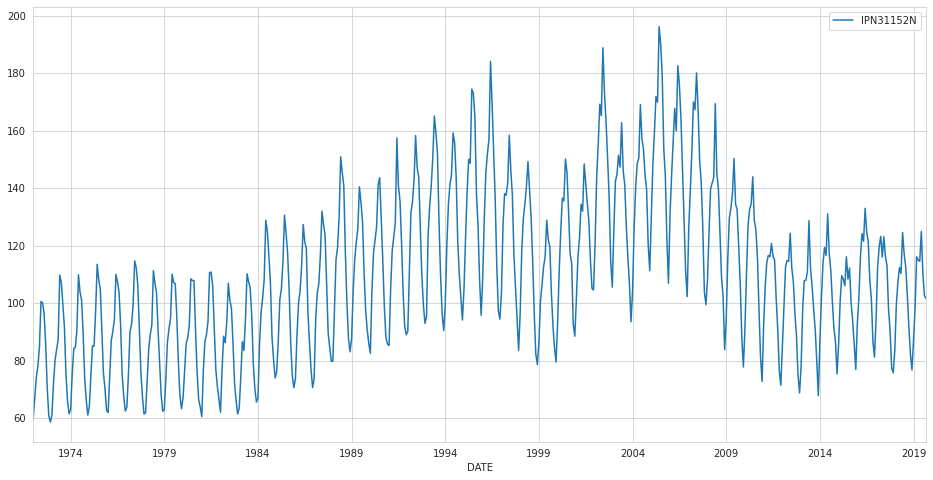

In [52]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [53]:
len(df)

573

In [54]:
test_months = 24

In [55]:
test_ind = len(df)- test_months
test_ind

549

In [56]:
test_ind 

549

In [57]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]
len(train), len(test)

(549, 24)

In [58]:
train.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [59]:
test.head()

,IPN31152N
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490


## Scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
df.columns

Index(['IPN31152N'], dtype='object')

In [62]:
scaler = MinMaxScaler()

In [63]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [64]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [65]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, 
                                train_scaled, 
                                length = length, 
                                batch_size = batch_size)

In [66]:
len(generator)

537

In [67]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]), array([[0.01774221]]))

In [68]:
X, y = generator[0]

In [69]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

## with "tanh" activation function

In [71]:
train_scaled.shape

(549, 1)

In [72]:
n_features = train_scaled.shape[1]

In [73]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [75]:
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [77]:
validation_generator = TimeseriesGenerator(test_scaled, 
                                           test_scaled, 
                                           length = length, 
                                           batch_size = batch_size)

In [78]:
len(validation_generator)  

12

In [79]:
model.fit_generator(generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/20
537/537 [==============================] - 12s 15ms/step - loss: 0.0168 - val_loss: 0.0025
Epoch 2/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0053 - val_loss: 0.0028
Epoch 3/20
537/537 [==============================] - 10s 18ms/step - loss: 0.0048 - val_loss: 0.0022
Epoch 4/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0039 - val_loss: 0.0045
Epoch 5/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0043 - val_loss: 0.0022
Epoch 6/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 7/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 8/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 9/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 10/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0034 - val_

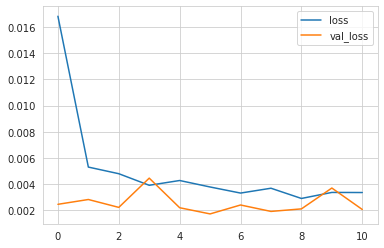

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [82]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [83]:
y_pred = model.predict(validation_generator) 

y_pred

array([[0.24223365],
       [0.2004585 ],
       [0.19238788],
       [0.20960952],
       [0.27024582],
       [0.33887526],
       [0.41797334],
       [0.44761068],
       [0.43830124],
       [0.42502886],
       [0.35038793],
       [0.26168624]], dtype=float32)

In [84]:
eval_metrics(test_scaled[-12:], y_pred)

r2_score: 0.8421838871213507 
 mae: 0.03445710121117313 
 mse: 0.0017245609331480898 
 rmse: 0.04152783323444759


In [85]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

### Inverse Transformation and Comparing

In [86]:
true_predictions = scaler.inverse_transform(test_predictions)

In [87]:
test['Predictions'] = true_predictions

In [88]:
test

,IPN31152N,Predictions
DATE,,
2017-10-01,90.473,94.372
2017-11-01,77.438,92.575
2017-12-01,75.812,96.720
2018-01-01,83.434,104.012
2018-02-01,99.490,111.265
2018-03-01,107.315,116.874
2018-04-01,112.431,120.378
2018-05-01,110.354,121.245
2018-06-01,124.584,119.542


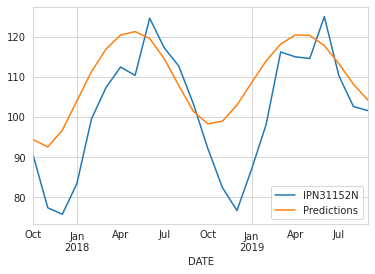

In [89]:
test.plot();

## with "relu" activation function

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

n_features = 1

model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features))) 
model.add(Dense(1))  
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

### Evaluation on Test Data

### Inverse Transformation and Comparing

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___